In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
rng = np.random.RandomState(seed=1)
X = np.concatenate([rng.normal(-1,1.5,350),
                    rng.normal(0,1,500),
                    rng.normal(3,0.5,150)]).reshape(-1,1)

c:\Users\TJ\anaconda3\envs\MA390-390_PNNL\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\TJ\anaconda3\envs\MA390-390_PNNL\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\TJ\anaconda3\envs\MA390-390_PNNL\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\TJ\anaconda3\envs\MA390-390_PNNL\Lib\site-packages\sklearn\cluster\_kmeans.p

In [49]:
rng = np.random.RandomState(seed=1)
m1 = np.load('../matrices/2024_FULL-STACK.npy')
X = np.random.choice(m1[m1!=0.0].flatten(), (20000,1))

In [50]:
k_arr = np.arange(10) + 1
models = [
    GaussianMixture(n_components=k).fit(X)
    for k in k_arr
]

In [51]:
# Plot function
def plot_mixture(gmm, X, show_legend=True, ax=None):
    if ax is None:
        ax = plt.gca()

    # Compute PDF of whole mixture
    x = np.linspace(8000, 14000, 5000)
    logprob = gmm.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)

    # Compute PDF for each component
    responsibilities = gmm.predict_proba(x.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    # Plot data histogram
    ax.hist(X, 250, density=True, histtype='stepfilled', alpha=0.4, label ='Data')

    # Plot PDF of whole model
    ax.plot(x, pdf, '-k', label='Mixture PDF')
    
    # Plot PDF of each component
    ax.plot(x, pdf_individual, '--', label='Component PDF')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    if show_legend:
        ax.legend()

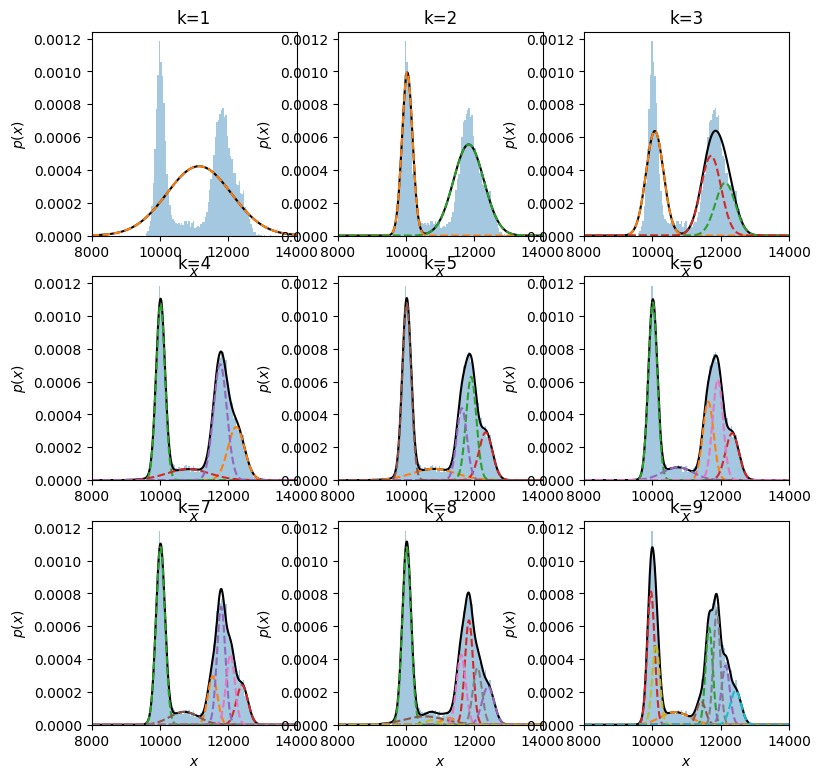

In [52]:
# Show all models for n_components 1 to 9
_, axes = plt.subplots(3,3,figsize=np.array([3,3])*3, dpi=100)
for gmm, ax in zip(models, axes.ravel()):
    plot_mixture(gmm, X, show_legend=False, ax=ax)
    ax.set_title(f'k={gmm.n_components}')
    ax.set_xlim(8000, 14000)
#plt.tight_layout
plt.show()